In [1]:
import pandas as pd
import numpy as np
from model_training import train_model
import keras

2023-06-24 16:01:15.837599: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-24 16:01:15.952372: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-24 16:01:17.736172: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv("Data/training_dataset.csv")
df.set_index("Date", inplace=True)

In [3]:
df.head()

,District Name,ndvi,savi,ndre,Rainfall,Skin_Tmp,Max_Tmp,Min_Tmp,APAR,Potato_Yield,Tomato_Yield,Tomato_b_Yield,Radish_Yield,Carrot_Yield,Cabbage_Yield,Cauliflower_Yield
Date,,,,,,,,,,,,,,,,
2018-12-16,0,0.5155,0.2945,0.3215,0.00,10.87,21.61,8.05,72.62,26.469077,13.831092,70.3,18.254333,18.282961,14.954172,15.410276
2018-12-23,0,0.4030,0.2440,0.2560,0.00,8.52,19.05,6.08,62.54,26.469077,13.831092,70.3,18.254333,18.282961,14.954172,15.410276
2018-12-30,0,0.3730,0.2385,0.2535,0.00,7.86,18.87,7.06,59.80,26.469077,13.831092,70.3,18.254333,18.282961,14.954172,15.410276
2019-01-06,0,0.5010,0.2970,0.3120,2.03,9.43,13.53,8.51,25.16,23.512821,31.328155,78.0,23.997122,13.202756,15.000000,18.314685
2019-01-27,0,0.4180,0.2850,0.2920,0.31,8.12,16.52,4.58,49.37,23.512821,31.328155,78.0,23.997122,13.202756,15.000000,18.314685


# Load Tomato Model Architecture for training

In [4]:
saved_model_path = "Models/Tomato_Yield"
model = keras.models.load_model(saved_model_path)

2023-06-24 16:08:51.398662: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


# Train the model with the desire number of epochs

Epoch 1/20
15/48 [========>.....................] - ETA: 0s - loss: 1.4721 - mean_absolute_error: 1.4721

48/48 [==============================] - 1s 12ms/step - loss: 1.7043 - mean_absolute_error: 1.7043 - val_loss: 2.5510 - val_mean_absolute_error: 2.5510
Epoch 2/20
48/48 [==============================] - 0s 10ms/step - loss: 1.6569 - mean_absolute_error: 1.6569 - val_loss: 2.1266 - val_mean_absolute_error: 2.1266
Epoch 3/20
48/48 [==============================] - 0s 9ms/step - loss: 1.6411 - mean_absolute_error: 1.6411 - val_loss: 2.4866 - val_mean_absolute_error: 2.4866
Epoch 4/20
48/48 [==============================] - 1s 11ms/step - loss: 1.5714 - mean_absolute_error: 1.5714 - val_loss: 2.2726 - val_mean_absolute_error: 2.2726
Epoch 5/20
48/48 [==============================] - 1s 11ms/step - loss: 1.6656 - mean_absolute_error: 1.6656 - val_loss: 2.4108 - val_mean_absolute_error: 2.4108
Epoch 6/20
48/48 [==============================] - 0s 9ms/step - loss: 1.4901 - mean_absolute_error: 1.4901 - val_loss: 2.2996 - val_mean_absolute_error: 2.2996
Epoch 7/20
48/48 [=================

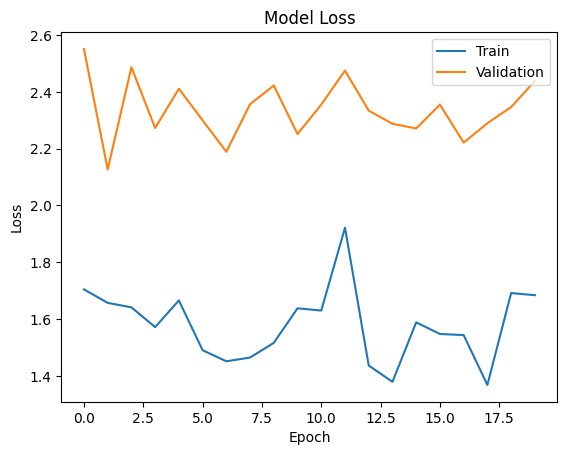

15/15 [==============================] - 0s 3ms/step
478


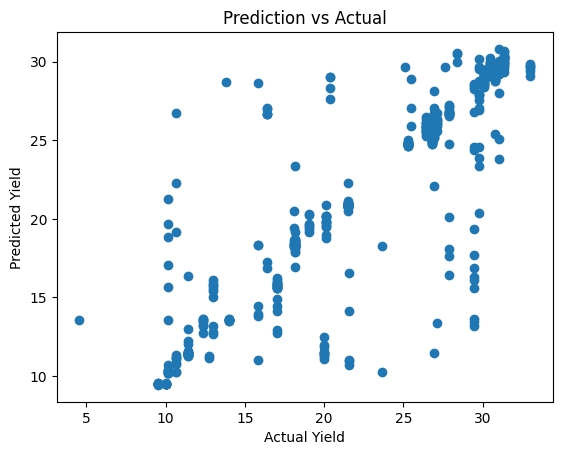

y_test : (478,)
y_pred : (478,)


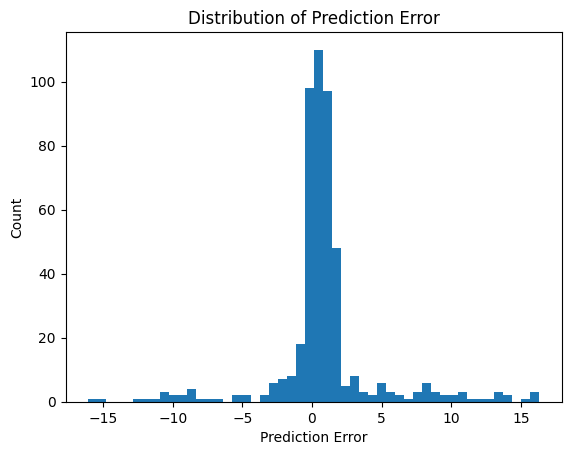

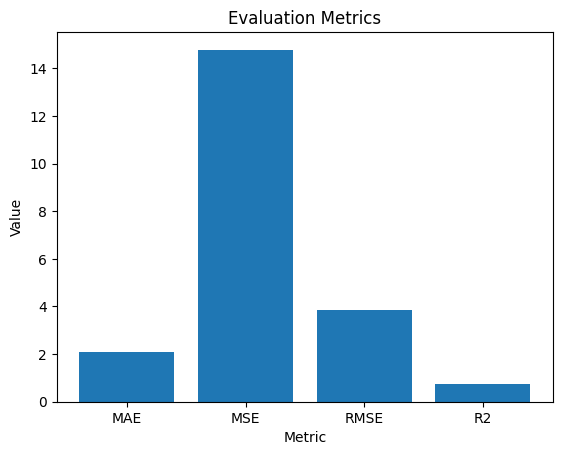

In [6]:
train_model(df,model,20,"Tomato_Yield")

# Model Prediction

In [7]:
model.predict(np.array([2,0.7645 ,0.5049 ,0.5365 ,0 ,10.63,19.76 ,4.53 ,0]).reshape(1,-1))

1/1 [==============================] - 0s 38ms/step


array([[50.496574]], dtype=float32)

In [8]:
model.predict(np.array([2,0.566747069,0.809228102,0.378135666,0,9.87,17.46,4.44,61.17]).reshape(1,-1))

1/1 [==============================] - 0s 46ms/step


array([[256.2501]], dtype=float32)